&nbsp;
<div style="text-align: center;">

## <span style="color: black;">Website SuperClassics - Europe Classic Cars</span>

&nbsp;

![SuperClassics Logo](superclassics_logo.png)

&nbsp;

### <span style="color: black;">Descriptive Analysis</span>

#### <span style="color: #003E99"> *89 Brands, 3097 suppliers* </font> </span>

## Index

- [<font color='black'> 1. Packages installation</font>](#1)



- [<font color='black'> 2. Data importation</font>](#2)



- [<font color='black'> 3. Descriptive Analysis</font>](#3)
  - [<font color='black'> 3.1. Suppliers by brand - Top 10</font>](#3.1) 
  - [<font color='black'> 3.2. Supplier by country - Top 10</font>](#3.2)
  - [<font color='black'> 3.3. Suppliers by continent</font>](#3.3)


## 1. Packages installation
<a id='1'>

In [1]:
#!!!INSTALL FIRST TIME!!!

#!pip3 install geopandas
#!pip3 install geopy
#!pip3 install cartopy

In [2]:
# dataset
import pandas as pd

# array
import numpy as np

# graph
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.patches import Rectangle
import geopandas as gpd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import LinearSegmentedColormap
import json
import pylab as plt

## 2. Data importation
<a id='2'>

In [3]:
db = pd.read_csv('Suppliers_processeddata.csv')

In [4]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2915 entries, 0 to 2914
Data columns (total 15 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Category                                            2915 non-null   object 
 1   Version                                             88 non-null     float64
 2   Supplier                                            2915 non-null   object 
 3   Supplier_type                                       2915 non-null   object 
 4   Country                                             2652 non-null   object 
 5   City                                                2652 non-null   object 
 6   Address                                             2915 non-null   object 
 7   IATA                                                2915 non-null   object 
 8   City_airport                                        2652 non-null   object 
 9

In [5]:
# Convert to numeric type
columns = ["climate_impact_kg_co2", "flight_distance_km", "co2_emissions_kg", "climate_impact_of_contrails_ozone_formation_etc_kg", "Fuel_consumption_l"]


for column in columns:
    db[column] = pd.to_numeric(db[column], errors='coerce')




In [6]:
db.head()

,Category,Version,Supplier,Supplier_type,Country,City,Address,IATA,City_airport,climate_impact_kg_co2,flight_distance_km,co2_emissions_kg,climate_impact_of_contrails_ozone_formation_etc_kg,Fuel_consumption_l,total_climate_impact
0,Abarth,8.0,Joop Stolze Classic Cars,service,Belgium,Lier,"Lierweg 34a, 2678 CW De Lier, Netherlands",TTC,Brea,3133.0,9634.0,1064.0,2069.0,421.0,5202.0
1,Abarth,NaN,Berni Motori,service,Italy,Vittoria,"Via Monte Vioz, 7, 26847 Maleo, LO, Italy",BAR,Bar,6055.0,15562.0,2042.0,4013.0,808.0,10068.0
2,Abarth,NaN,KFZ Werkstatt Harald Dietze,service,Germany,Zwickau,"Zwischen den Wegen 7, 78239 Rielasingen-Worbli...",HOF,Hof,1623.0,5691.0,559.0,1065.0,221.0,2688.0
3,Abarth,NaN,Middle Barton Garage,spare parts,United Kingdom,Bicester,"Ardley Road, Somerton, Bicester, Oxfordshire O...",OXF,Oxford,449.0,1619.0,169.0,280.0,67.0,729.0
4,AC,NaN,Cobra Performance Ltd,service,United Kingdom,Arnold,"777 Arnold Drive Suite 200, Martinez, CA 94553...",LBE,Arnold,1705.0,5919.0,586.0,1119.0,232.0,2824.0


In [7]:
db.describe(include='all')

,Category,Version,Supplier,Supplier_type,Country,City,Address,IATA,City_airport,climate_impact_kg_co2,flight_distance_km,co2_emissions_kg,climate_impact_of_contrails_ozone_formation_etc_kg,Fuel_consumption_l,total_climate_impact
count,2915,88.000000,2915,2915,2652,2652,2915,2915,2652,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000
unique,89,NaN,2840,2,53,563,2803,338,356,NaN,NaN,NaN,NaN,NaN,NaN
top,Classic Car Dealer,NaN,Joop Stolze Classic Cars,service,Germany,Zwickau,"Lierweg 34a, 2678 CW De Lier, Netherlands",HOF,Hof,NaN,NaN,NaN,NaN,NaN,NaN
freq,656,NaN,9,2284,533,525,9,527,527,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.556818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2361.203413,7309.897597,805.860676,1555.369209,317.993034,3916.572623
std,NaN,2.807453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1650.762094,3879.273534,552.344212,1098.394093,219.538412,2749.155965
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149.000000,520.000000,73.000000,73.000000,20.000000,224.000000
25%,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1623.000000,5691.000000,559.000000,1065.000000,221.000000,2688.000000
50%,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1850.000000,6322.000000,634.000000,1215.000000,251.000000,3065.000000
75%,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2606.000000,8298.000000,887.500000,1718.500000,351.000000,4324.500000


In [8]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2915 entries, 0 to 2914
Data columns (total 15 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Category                                            2915 non-null   object 
 1   Version                                             88 non-null     float64
 2   Supplier                                            2915 non-null   object 
 3   Supplier_type                                       2915 non-null   object 
 4   Country                                             2652 non-null   object 
 5   City                                                2652 non-null   object 
 6   Address                                             2915 non-null   object 
 7   IATA                                                2915 non-null   object 
 8   City_airport                                        2652 non-null   object 
 9

## 3. Descriptive Analysis
<a id='3'>

### 3.1. Suppliers by brand - Top 10
<a id='3.1'>

In [13]:
db_categories = ['Classic Car Dealer', 'Customs and Hot Rods', 'Military Vehicles', 'Kitcars',
                         'Race and rally cars', 'Trucks and Trailers', 'Prestige and Supercars',
                         'Range Rover', 'Pre-War Cars', 'Youngtimers', 'European Brands', 'Italian Brands', 'British Brands', 'German Brands', 'Mini', 'Glas', 'AC','American Brands']

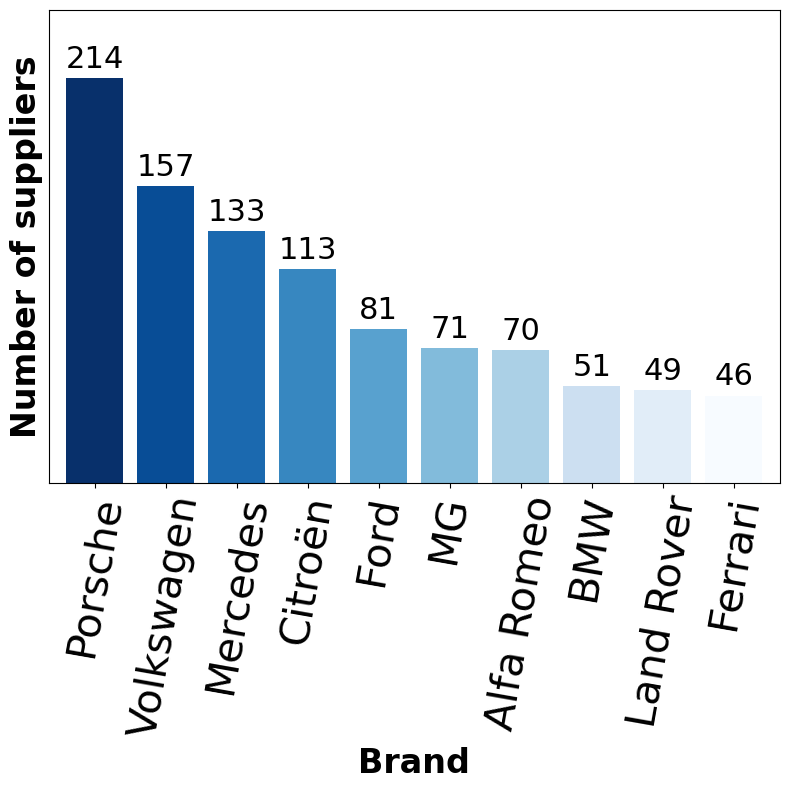

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Renomear 'Ford (USA)' para 'Ford'
db['Category'] = db['Category'].str.replace('Ford (USA)', 'Ford')
db['Category'] = db['Category'].str.replace('Mercedes-Benz', 'Mercedes')
# Juntar os valores para 'Ford'
db.loc[db['Category'] == 'Ford', 'Category'] = 'Ford'
brand_counts = db['Category'].value_counts()

# Filtrar as marcas que não estão em db_categories
filtered_brands = brand_counts[~brand_counts.index.isin(db_categories)]

# Obter as 10 marcas principais restantes
top_10_brands = filtered_brands.head(10).index.tolist()

# Filtrar o DataFrame original mantendo apenas as linhas com as 10 marcas principais
top_10 = db[db['Category'].isin(top_10_brands)]

# Plotar o gráfico de barras
plt.figure(figsize=(8,8)) 
bars = top_10['Category'].value_counts().plot(kind='bar', color=plt.cm.Blues_r(np.linspace(0, 1, len(top_10_brands))), width=0.8)

# Adicionar rótulos e título ao gráfico
plt.xlabel('Brand', fontsize=24, weight='bold')
plt.ylabel('Number of suppliers', fontsize=24, weight='bold')
plt.xticks(rotation=80, fontsize=30)
plt.yticks([])  # Remover os ticks do eixo y
plt.ylim(0,250)
# Adicionar valores em cima de cada barra
for bar in bars.patches:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=22)

# Ajustar o layout para salvar com as legendas
plt.tight_layout()

# Salvar
plt.savefig('DescriptiveAnalysis_Suppliers_Top10_Brands.eps', dpi=300)
plt.savefig('DescriptiveAnalysis_Suppliers_Top10_Brands.png', dpi=300)
# Mostrar
plt.show()



### 3.2. Suppliers by country - Top 10
<a id='3.2'>

In [36]:
db_top10_country_s=db['Country'].value_counts().head(10)
db_top10_country_s

Country
Germany           533
United States     441
Netherlands       404
United Kingdom    274
France            206
Canada            120
Belgium           119
Australia         118
Switzerland        88
Italy              60
Name: count, dtype: int64

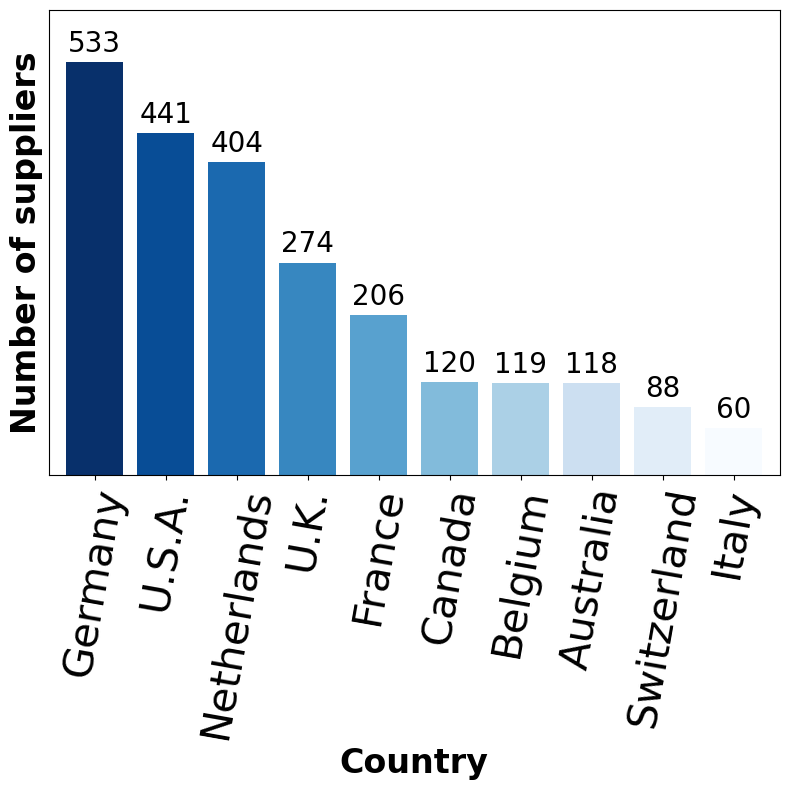

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Supondo que db_top10_country_s é o seu DataFrame
top_10 = db_top10_country_s

# Renomear os países
top_10 = top_10.rename(index={
    'United States': 'U.S.A.',
    'United Kingdom': 'U.K.'
})

# Tamanho da figura
plt.figure(figsize=(8, 8))  

# Gráfico
bars = top_10.plot(kind='bar', color=plt.cm.Blues_r(np.linspace(0, 1, len(top_10))), width=0.8) 

# Legendas dos eixos
plt.xlabel('Country', fontsize=24, weight='bold')
plt.ylabel('Number of suppliers', fontsize=24, weight='bold')

# Adicionando números em cima das barras
for bar in bars.patches:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', 
                 (bar.get_x() + bar.get_width() / 2, height), 
                 ha='center', 
                 va='bottom', 
                 fontsize=20, 
                 color='black', 
                 xytext=(0, 3),  # deslocamento vertical
                 textcoords="offset points")

# Remover ticks do eixo y
plt.yticks([])  # Remove todos os ticks do eixo y

# Definir limite do eixo y
plt.ylim(0, 600)  # Define o limite do eixo y de 0 a 600

# Rotação e tamanhos das legendas
plt.xticks(rotation=80, fontsize=30)

# Ajuste automático para salvar (com legendas)
plt.tight_layout()  

# Salvar
plt.savefig('DescriptiveAnalysis_Suppliers_Top10_Country.png', dpi=300)
plt.savefig('DescriptiveAnalysis_Suppliers_Top10_Country.eps', dpi=300)

# Mostrar
plt.show()


### 3.5. Suppliers by continent
<a id='3.5'>

In [38]:
# Copy
db_analysis = pd.DataFrame(db)

# Dict to map each continent by country
country_to_continent = {
    'British Brands': 'Europe',
    'German Brands': 'Europe',
    'French Brands': 'Europe',
    'East German Brands': 'Europe',
    'Japanese Brands': 'Asia',
    'American Brands': 'America',
    'European Brands': 'Europe',
    'Italian Brands': 'Europe',
    'Russian Brands': 'Asia',
}

# New continent column
db_analysis['Continent'] = db_analysis['Category'].map(country_to_continent)

# Count 
contagem_por_continente = db_analysis['Continent'].value_counts()

print(contagem_por_continente)

Continent
Europe     352
America    301
Asia         6
Name: count, dtype: int64


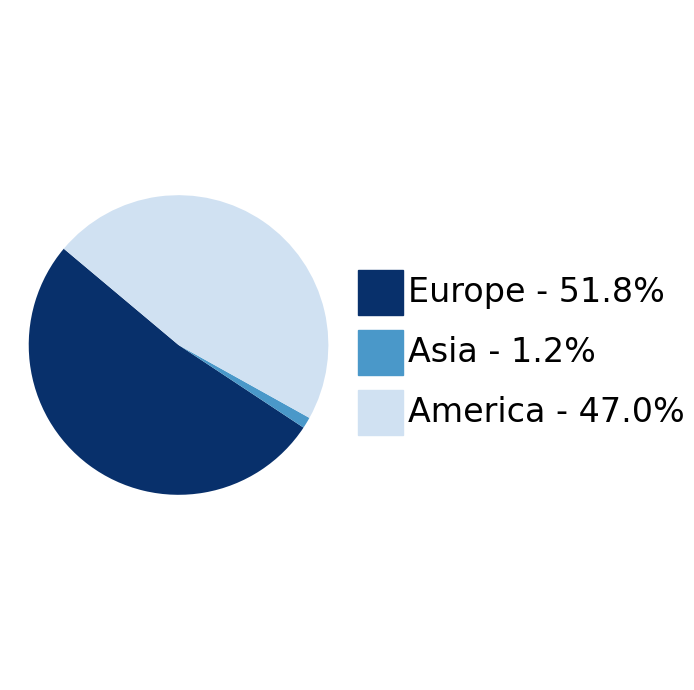

In [39]:
# data
continent = ['Europe', 'Asia', 'America']
quantities = [257, 6, 233]
colors = plt.cm.Blues_r(np.linspace(0, 0.8, len(continent )))

# percentages
total = sum(quantities)
percentagens = [(q / total) * 100 for q in quantities]

# figure size
plt.figure(figsize=(7, 7))

# graph
pie, texts, autotexts = plt.pie(quantities, labels=None, autopct='', colors=colors, startangle=140)

# percentages size
for autotext in autotexts:
    autotext.set_fontsize(12)  # Define o tamanho da fonte das porcentagens

# title
#plt.title('Distribution of Classic Car Suppliers by Continent', fontsize=14)

# legend with boxes
legend_labels = continent 

# legend sizes
legend_x = 1.2
legend_y = 0.2

#boxes size
rect_width = 0.3 
rect_height = 0.3  

# add legends

for i, label in enumerate(legend_labels):
    # rectangle
    rect = Rectangle((legend_x, legend_y - i * 0.4), rect_width, rect_height, color=colors[i])
    plt.gca().add_patch(rect)  # Adicione o retângulo ao gráfico
    # legend
    plt.text(legend_x + rect_width + 0.03, legend_y - i * 0.4 + rect_height / 2, f'{label} - {percentagens[i]:.1f}%', fontsize=24, va='center')

# axis
plt.axis('equal')

# automatic size for save (with legends)
plt.tight_layout()

# Save
plt.savefig('DescriptiveAnalysis_Suppliers_Continent_pie.PNG',  dpi=300)
plt.savefig('DescriptiveAnalysis_Suppliers_Continent_pie.eps',  dpi=300)
# show
plt.show()

<span style='color:blue'> 

There are mostly european suppliers in this website (51.8%), american suppliers (47%) in second and Adia (1.2%) in third place.